In [324]:
# Código feito por Dimas Germano Brandão Soares Silva# Estudos e desafios feitos para Quarentena de dados# github: https://github.com/dimasgb7import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filmes = pd.read_csv\
    ("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ['filmeId','titulo','generos']

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']

In [325]:
avaliacoes_filme_1 = avaliacoes.query("filmeId == 1")
descricao_notas_filme_1 = avaliacoes_filme_1.describe()['nota']

In [326]:
nota_media_avaliacao_por_filme = avaliacoes.groupby("filmeId")\
                                            ['nota'].mean()
nota_media_avaliacao_por_filme
filmes_com_media = filmes.join(nota_media_avaliacao_por_filme, on="filmeId")
filmes_com_media.rename(columns = {'nota':'nota_media'},inplace=True)

## Desafio 1

In [327]:
numero_de_filmes_sem_nota=\
filmes_com_media.query("nota_media.isnull()")['filmeId'].count()
print("Numero de filmes sem nota: ", numero_de_filmes_sem_nota)

Numero de filmes sem nota:  18


## Desafio 2 e 3

In [328]:
numero_de_avaliacao_por_filme = avaliacoes.groupby("filmeId")\
                                                  ['nota'].count()
filmes_mod = filmes_com_media
filmes_mod = filmes_mod.join(numero_de_avaliacao_por_filme, on='filmeId')
filmes_mod.rename(columns= {"nota":"numero_de_votos"},inplace=True)
filmes_mod.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4

In [329]:
import math
round_by_two = lambda x: round(x , 2) if not math.isnan(x) else x
filmes_mod['nota_media'] = filmes_mod['nota_media'].apply(round_by_two)
filmes_mod.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5

In [330]:
generos = filmes_mod['generos']
generos = [genero.split('|') for genero  in generos]
generos = sum(generos,[])
lista_de_generos = list(dict.fromkeys(generos_one))
lista_de_generos

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

## Desafio 6

In [331]:
dicionario_de_generos = { gen:generos.count(gen) for gen in lista_de_generos}
dicionario_de_generos

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

## Desafio 7

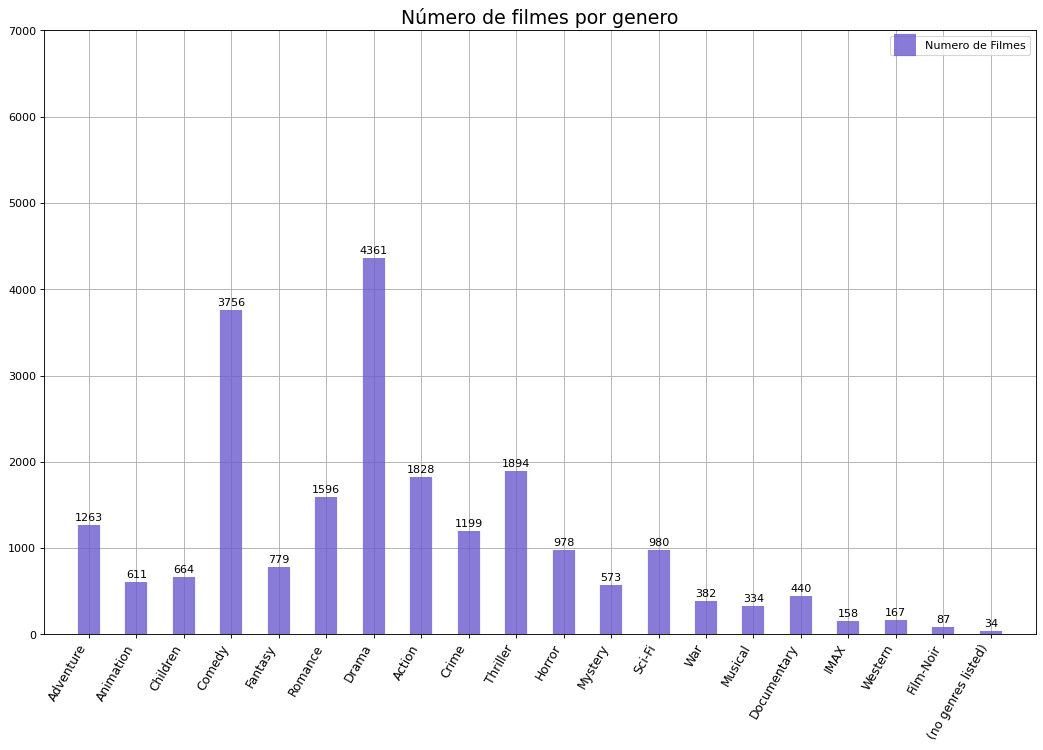

In [332]:
#Fazendo um plot de barramas
#Preparar o dicionario
df = pd.DataFrame.from_dict(dicionario_de_generos, 
                            orient='index',
                            columns=['numero'])
#Plotar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, 
          ymin=0, ymax=df.numero, 
          color='slateblue', alpha=0.8, linewidth=20,label='Numero de Filmes')

#Colocar o texto no top da barra
for i, numero in enumerate(df.numero):
    ax.text(i, numero+50, numero, horizontalalignment='center')

#Titulo e coisas bonitas
ax.set_title('Número de filmes por genero', fontsize=17)
ax.set(ylim=(0, 7000))
plt.xticks(df.index, df.index , rotation=60, horizontalalignment='right', fontsize=11)

#Despachando
plt.grid(True)
plt.legend()